In [1]:
import uproot
import pandas as pd
import numpy as np

from root_pandas import read_root

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import concurrent.futures, multiprocessing
ncpu = multiprocessing.cpu_count()
executor = concurrent.futures.ThreadPoolExecutor(ncpu*4)

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
hits_branches = ['rechit_skiroc',
        'rechit_channel',
        'rechit_x',
        'rechit_y',
        'rechit_energy',
        'rechit_layer'
        ]

info_branches = ['run', 'event','PI_positionX', 'PI_positionY',]

tracks_branches = ['ntracks',
         'impactX_HGCal_layer_1',
         'impactY_HGCal_layer_1'
        ]

In [3]:
fname = "calo_setup/ntuple_1222.root"

df = read_root(fname, "rechitntupler/hits", columns = hits_branches + info_branches)

In [4]:
df[:2]

,rechit_x,rechit_y,rechit_layer,run,rechit_channel,rechit_energy,rechit_skiroc,PI_positionY,PI_positionX,event
0,"[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1222,"[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[0.35155967, 0.39493895, 0.49695483, 1.9753718...","[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...",-999.0,-999.0,1
1,"[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...",1222,"[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1...","[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...",-999.0,-999.0,2


In [30]:
fname = "calo_setup/ntuple_1222.root"

df_flat = read_root(fname, "rechitntupler/hits", columns = ['rechit_*','PI*'], flatten=hits_branches)

In [31]:
df_flat[:10]

,rechit_x,rechit_y,rechit_channel,rechit_layer,rechit_energy,rechit_skiroc,PI_positionY,PI_positionX,__array_index
0,0.000010,1.12519,36,1,0.351560,3,-999.0,-999.0,0
1,-1.948894,0.00001,18,1,0.394939,0,-999.0,-999.0,1
2,0.000010,1.12519,34,2,0.496955,5,-999.0,-999.0,2
3,-0.974442,-5.06339,20,2,1.975372,7,-999.0,-999.0,3
4,-0.974442,1.68779,26,2,11.167682,4,-999.0,-999.0,4
5,-0.974442,0.56259,24,2,3.745964,4,-999.0,-999.0,5
6,-1.948894,-5.62599,18,2,1.122462,7,-999.0,-999.0,6
7,-1.948894,3.37559,30,2,2.274768,4,-999.0,-999.0,7
8,-1.948894,2.25039,28,2,4.835638,4,-999.0,-999.0,8
9,-1.948894,1.12519,22,2,1.855637,4,-999.0,-999.0,9


In [32]:
selection = df_flat.rechit_layer == 1
selection &= df_flat.rechit_energy > 0.2

In [33]:
df_flat = df_flat[selection]

In [34]:
df_flat[:10]

,rechit_x,rechit_y,rechit_channel,rechit_layer,rechit_energy,rechit_skiroc,PI_positionY,PI_positionX,__array_index
0,0.000010,1.12519,36,1,0.351560,3,-999.0,-999.0,0
1,-1.948894,0.00001,18,1,0.394939,0,-999.0,-999.0,1
29,0.000010,-5.62599,8,1,0.516913,1,-999.0,-999.0,0
30,2.923345,-2.81299,44,1,1.070182,1,-999.0,-999.0,1
31,0.974442,0.56259,38,1,0.359187,2,-999.0,-999.0,2
50,-1.948894,5.62599,18,1,0.364511,3,-999.0,-999.0,0
51,-3.897797,5.62599,16,1,0.415584,3,-999.0,-999.0,1
78,0.974442,-1.68779,38,1,0.468237,1,-999.0,-999.0,0
79,-2.923345,-6.18859,20,1,0.557742,1,-999.0,-999.0,1
101,-1.948894,-2.25039,28,1,0.393797,0,-999.0,-999.0,0


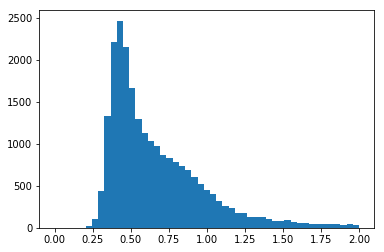

In [36]:
n, _ , _ = plt.hist(df_flat.rechit_energy, np.linspace(0,2,50))

In [5]:
hits_branches = ['rechit_skiroc',
        'rechit_channel',
        'rechit_x',
        'rechit_y',
        'rechit_energy',
        ]

info_branches = ['run', 'event','PI_positionX', 'PI_positionY',]

tracks_branches = ['ntracks',
         'impactX_HGCal_layer_1',
         'impactY_HGCal_layer_1'
        ]

In [6]:
# Read and cache data
cache_info = {}
cache_hits = {}
cache_tracks = {}

In [7]:
df_info = hits.pandas.df(info_branches, cache = cache_info,executor=executor)
df_hits = hits.pandas.df(hits_branches, cache = cache_hits,executor=executor)
df_tracks = tracks.pandas.df(tracks_branches, cache = cache_tracks,executor=executor)

In [8]:
df_hits[:2]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy
0,"[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...","[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[0.35155967, 0.39493895, 0.49695483, 1.9753718..."
1,"[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...","[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1..."


In [9]:
df_tracks[:2]

,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1
0,1,[-5.3245564],[-1.2472391]
1,1,[0.63384724],[2.4550781]


In [10]:
len(df_info)

10056

In [11]:
len(df_hits)

10056

In [12]:
len(df_tracks)

10056

In [13]:
df_tracks = pd.concat([df_info, df_tracks], axis=1, join_axes=[df_info.index])

In [14]:
df_all = pd.concat([df_hits, df_tracks], axis=1, join_axes=[df_hits.index])

In [15]:
df_all[:3]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,run,event,PI_positionX,PI_positionY,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1
0,"[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...","[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[0.35155967, 0.39493895, 0.49695483, 1.9753718...",1222,1,-999.0,-999.0,1,[-5.3245564],[-1.2472391]
1,"[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...","[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1...",1222,2,-999.0,-999.0,1,[0.63384724],[2.4550781]
2,"[3, 3, 5, 4, 7, 4, 4, 7, 7, 7, 5, 7, 11, 11, 1...","[18, 16, 18, 26, 18, 30, 28, 32, 30, 28, 12, 2...","[-1.9488935, -3.897797, 1.0006059e-05, -0.9744...","[5.62599, 5.62599, 3.3755898, 1.6877899, -5.62...","[0.36451125, 0.41558436, 0.45885077, 5.7964635...",1222,3,-999.0,-999.0,1,[5.841098],[2.234633]


In [16]:
selection = df_tracks.ntracks == 1
#selection &= 

In [17]:
df_all = df_all[selection]

In [18]:
## convert Series to float for impact position (take first element, which for ntracks=1 is the only one)
impact_x = df_all.apply(lambda row: row.impactX_HGCal_layer_1[0], axis=1)
impact_y = df_all.apply(lambda row: row.impactY_HGCal_layer_1[0], axis=1)

In [21]:
df_all.loc[impact_x.index, 'impact_x'] = impact_x
df_all.loc[impact_y.index, 'impact_y'] = impact_y

In [22]:
df_all[:2]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,run,event,PI_positionX,PI_positionY,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1,impact_x,impact_y
0,"[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...","[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[0.35155967, 0.39493895, 0.49695483, 1.9753718...",1222,1,-999.0,-999.0,1,[-5.3245564],[-1.2472391],-5.324556,-1.247239
1,"[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...","[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1...",1222,2,-999.0,-999.0,1,[0.63384724],[2.4550781],0.633847,2.455078


In [23]:
df_all.rechit_energy

0        [0.35155967, 0.39493895, 0.49695483, 1.9753718...
1        [0.5169128, 1.070182, 0.35918677, 1.1010299, 1...
2        [0.36451125, 0.41558436, 0.45885077, 5.7964635...
3        [0.46823746, 0.5577423, 1.3197827, 8.2040415, ...
4        [0.39379656, 1.1645092, 0.37394753, 4.766571, ...
5        [0.3699954, 4.102713, 7.0221953, 4.0269313, 1....
8        [1.0961077, 0.4566724, 0.6254172, 5.612036, 4....
13       [0.83746463, 0.29761407, 1.0459461, 1.8773766,...
16       [0.61589295, 0.60864913, 0.5277482, 6.9842925,...
17       [0.71043605, 0.6234359, 13.303896, 4.3860235, ...
19       [0.90394056, 0.5200874, 1.2467189, 1.45777, 9....
20       [0.4196573, 0.30727145, 0.44502217, 0.9230165,...
22       [0.39109626, 0.46303073, 7.4423647, 0.44181386...
23       [0.49660254, 0.81229925, 3.0024278, 0.40993905...
24       [2.2034051, 0.68453526, 0.5863843, 0.76692617,...
25       [0.9816663, 17.178785, 8.777766, 4.9849854, 6....
27       [0.65665865, 0.50524676, 0.36050093, 0.4615398.

In [24]:
df_all.rechit_x += df_all.impact_x/10.
df_all.rechit_y += df_all.impact_y/10.

In [25]:
np.concatenate(list(df_all.rechit_x))

array([-0.5324456, -2.4813492, -0.5324456, ...,  0.7809794, -4.0912595,
        3.7043347], dtype=float32)

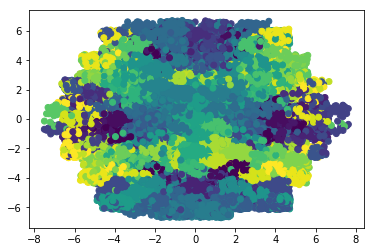

In [36]:
plt.scatter(np.concatenate(list(df_all.rechit_x)),
            np.concatenate(list(df_all.rechit_y)),
            c = np.concatenate(list(df_all.rechit_channel)))

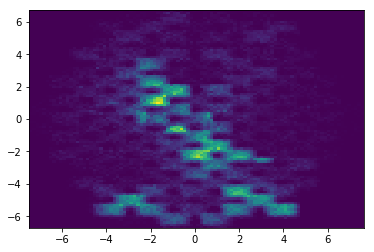

In [27]:
xs, ys = np.concatenate(list(df_all.rechit_x)), np.concatenate(list(df_all.rechit_y))
n, _, _, _ = plt.hist2d(xs, ys, 100)

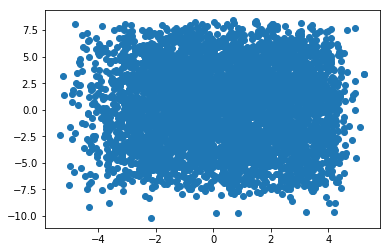

In [28]:
plt.scatter(df_all.impactY_HGCal_layer_1,df_all.impactX_HGCal_layer_1)